# First-principles machine learning modelling of COVID-19

<img src="./images/f-p_model.png"/>

<img src="./images/sird_model.png" />

## where $$N = S+I+R+D$$

# The SIRD model:

## \begin{align}
&\dot S= - \frac{\beta I S}{N},\\
&\dot I = \frac{\beta I S}{N} - (\mu + \gamma) I,\\
&\dot R = \gamma I,\\
&\dot D = \mu I ,
\end{align}
### where $\beta$, $\gamma$, $\mu$, are rates of infection, recovery, and mortality, respectively.

# The SIRD model(divided by population):

## \begin{align}
&\dot s = -\beta i s,\\
&\dot i = \beta i s - (\mu + \gamma) i,\\
&\dot r = \gamma i,\\
&\dot d = \mu i.
\end{align}

## Loss Function:
L = 
\begin{align}
&\sum_{t=0}^{N_t} \left((\log(I_c(t)-\log(\hat{I}(t)))^2 + (\log(D_c(t)-\log(\hat{D}(t)))^2\right) + \\
&0.01 \frac{\log(\max(I_c))}{\max(I_c)}\sum_{t=0}^{N_t}\left((I_c(t))-\hat{I}(t))^2 + (D_c(t)-\hat{D}(t))^2\right) + \\
& 100\frac{\log(\max(I_c))}{\max(\alpha_0)}\sum_{t=0}^{N_t -1}\left((\hat{\beta}(t)-\hat{\beta}(t+1))^2 + (\hat{\gamma}(t)-\hat{\gamma}(t+1))^2 + 100(\hat{\mu}(t)-\hat{\mu}(t+1))^2\right)+ \\
& 100\frac{\log(\max(I_c))}{\max(\alpha_0)}\left((\hat{\beta}(0)-\beta_0)^2 + (\hat{\gamma}(0)-\gamma_0)^2 + 100(\hat{\mu}(0)-\mu_0)^2\right)
\end{align}

In [3]:
import pandas as pd
import glob,os
import numpy as np
import pandas as pd 
import numpy.matlib
import math
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import tensorflow as tf
%matplotlib inline

In [4]:
path = r'./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'

In [5]:
def get_us_data(path):
    us_infected = [];
    us_deaths = [];
    us_recovered = [];
    all_files = sorted(glob.glob(os.path.join(path, "*.csv")))
    for file in all_files:
        df = pd.read_csv(file)
        if 'Country/Region' in df:
            drop = np.where((df['Country/Region'] == 'US').values == False)[0]
        else:
            drop = np.where((df['Country_Region'] == 'US').values == False)[0]
        df_us = df.drop(drop)
        us_infected.append(np.sum(df_us.Confirmed.values))
        us_deaths.append(np.sum(df_us.Deaths.values))
        us_recovered.append(np.sum(df_us.Recovered.values))
    for i in range(len(us_deaths)):
        if math.isnan(us_deaths[i]):
            us_deaths[i]=0
        if math.isnan(us_infected[i]):
            us_infected[i]=0
        if math.isnan(us_recovered[i]):
            us_recovered[i]=0
    return [np.asarray(us_infected),np.asarray(us_deaths),np.asarray(us_recovered)]

In [6]:
def get_all_time_series():
    path = r'./COVID-19/csse_covid_19_data/csse_covid_19_time_series'
    all_files = glob.glob(os.path.join(path, "*.csv"))
    for i in [0,3,4]:
        file = all_files[i]
        df = pd.read_csv(file)
        #confirmed_all = dict()
        if i==0:
            df_confirmed = pd.DataFrame()
            for row in df.values:
                df_confirmed[row[1]] = row[4:]
        if i==3:
            df_recovered = pd.DataFrame()
            for row in df.values:
                df_recovered[row[1]] = row[4:]
        if i==4:
            df_deaths = pd.DataFrame()
            for row in df.values:
                df_deaths[row[1]] = row[4:]
    df_infected = df_confirmed - df_deaths - df_recovered
    return [df_infected,df_confirmed,df_recovered,df_deaths]

In [7]:
[df_infected,df_confirmed,df_recovered,df_deaths] = get_all_time_series()
us_infected = df_infected['US'].values
us_deaths = df_deaths['US'].values
us_recovered = df_recovered['US'].values

## usa population: ~327200000
## Regr : 70

In [8]:
us_population = 327200000;
Regr = 70

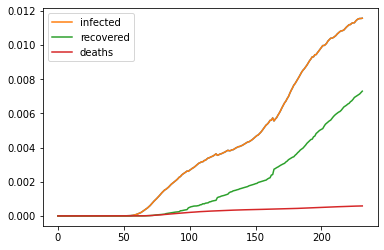

In [9]:
plt.plot(range(len(us_infected)),us_infected/us_population)
plt.plot(range(len(us_infected)),us_infected/us_population,label = "infected")
plt.plot(range(len(us_infected)),us_recovered/us_population,label = 'recovered')
plt.plot(range(len(us_infected)),us_deaths/us_population,label = 'deaths')
plt.legend()

In [10]:
us_infected

array([1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 8, 8,
       9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 9,
       16, 22, 39, 58, 85, 153, 194, 313, 422, 486, 677, 1064, 1475, 2052,
       2744, 2904, 4240, 5821, 8090, 12288, 18225, 23869, 32401, 42910,
       52763, 64369, 81197, 98979, 118101, 135068, 152899, 176471, 199310,
       227685, 257524, 284208, 307696, 333435, 359459, 387211, 417888,
       445791, 471218, 496240, 509091, 529420, 551574, 578089, 604878,
       624893, 643743, 666952, 686893, 710629, 739313, 754574, 784504,
       804248, 820811, 838593, 858808, 852888, 875091, 891227, 910924,
       925038, 944294, 967067, 987889, 1009363, 1020067, 1035303, 1036603,
       1059612, 1065663, 1088513, 1107799, 1114055, 1128412, 1138096,
       1150779, 1168140, 1188172, 1159352, 1168962, 1183656, 1189678,
       1202154, 1212312, 1225466, 1242355, 1255827, 1246859, 1249965,
       1264155, 1267716, 1282300, 1299906, 1312836, 1324611, 1

In [11]:
Iregr = us_infected[0:Regr]
Dregr = us_deaths[0:Regr]

In [12]:
Iregr[-1]

176471

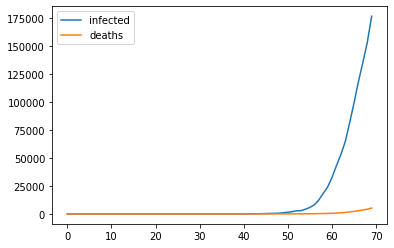

In [13]:
plt.plot(range(len(Iregr)),Iregr,label = 'infected')
plt.plot(range(len(Dregr)),Dregr,label = 'deaths')
plt.legend()

In [14]:
def solve_sird_new(num_times,beta_t,gamma_t,mu_t,s0,i0,r0,d0):
    t = np.linspace(0,num_times-1,num_times)
    #times = np.arange(len(beta_t))
    #Us = np.empty((len(beta_t),4))
    q0 = [s0,i0,r0,d0]
    interp = interp1d(t,(beta_t,gamma_t,mu_t))
    
    def system(t, U):
        #print(U)
        s,i,r,d = U[0],U[1],U[2],U[3]
        #print(t)
        beta, gamma, mu = interp(t)
        return np.array([-beta*s*i, beta*s*i-(gamma+mu)*i, gamma*i, mu*i])
    
    steps = 1
    atol = 1e-6
    method = 'RK45'
    solution = solve_ivp(system, (0, num_times-1), q0, method=method, t_eval=t, atol=atol, vectorized=True,max_step=1,first_step=0.05)
    return solution

In [15]:
def solve_SIRD_discrete(num_times,beta_t,gamma_t,mu_t,s0,i0,r0,d0):
    S = []
    I = []
    R = []
    D = []

    S.append(us_population-1.)
    I.append(1.)
    R.append(0.)
    D.append(0.)
    num_times = len(beta_t)

    for i in range(num_times-1):
        Snew = S[i] - beta_t[i]/us_population * S[i]*I[i]
        Inew = I[i] + beta_t[i]/us_population * S[i]*I[i] - gamma_t[i]*I[i] - mu_t[i]*I[i]
        Rnew = R[i] + gamma_t[i]* I[i]
        Dnew = D[i] + mu_t[i]* I[i]
        S.append(Snew)
        I.append(Inew)
        R.append(Rnew)
        D.append(Dnew)
    return [S,I,R,D]

In [16]:
def plot_sird(num_times,s,i,r,d):
    times = np.arange(num_times)
    plt.plot(times,s,label='susceptible')
    plt.plot(times,i,label='infected')
    plt.plot(times,r,label='recovered')
    plt.plot(times,d,label='dead')
    plt.legend(bbox_to_anchor=[1,0.7])
    plt.xlabel('time (days)')
    plt.ylabel('fraction of total population')

In [17]:
i0 = us_infected[0]/us_population
r0 = 0
s0 = 1-i0
#R1 = 3./100.
d0 = 0
num_times = len(us_deaths)

#beta=0.26
#gamma=0.08
#mu=0.0033

#beta = 0.275
#gamma = 0.095
#mu = 0.0033

beta = 0.6345301162187955
gamma = 0.43979856466213035
mu = 0.006641658374541129

beta_0 = np.array([beta for i in range(num_times)])
gamma_0 = np.array([gamma for i in range(num_times)])
mu_0 = np.array([mu for i in range(num_times)])


print("beta={}\ngamma={}\nmu={}".format(beta,gamma,mu))

beta=0.6345301162187955
gamma=0.43979856466213035
mu=0.006641658374541129


In [18]:
num_times = len(us_deaths[0:Regr])
solution= solve_sird_new(num_times,beta_0[0:Regr],gamma_0[0:Regr],mu_0[0:Regr],s0,i0,r0,d0)
s = solution.y[0,:]
i = solution.y[1,:]
r = solution.y[2,:]
d = solution.y[3,:]
S,I,R,D = solve_SIRD_discrete(num_times,beta_0[0:Regr],gamma_0[0:Regr],mu_0[0:Regr],s0,i0,r0,d0)

In [19]:
Ip = i*us_population
Dp = d*us_population

In [20]:
num_times

70

249966.08171699638


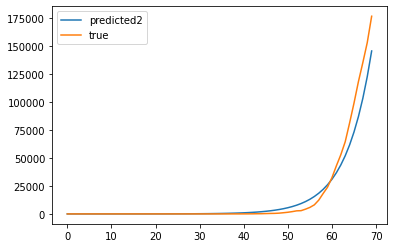

In [21]:
#plt.plot(np.arange(0,Regr),Ip , label='predicted1')
plt.plot(np.arange(0,Regr),I , label='predicted2')
plt.plot(np.arange(0,Regr),us_infected[0:Regr],label='true')
plt.legend()
print(np.max(np.abs((Ip-us_infected[0:Regr]))))

9922.112531945106


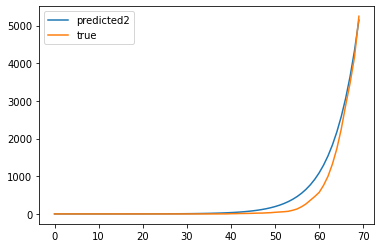

In [22]:
#plt.plot(np.arange(0,Regr),Dp , label='predicted1')
plt.plot(np.arange(0,Regr),D , label='predicted2')
plt.plot(np.arange(0,Regr),us_deaths[0:Regr],label='true')
plt.legend()
print(np.max(np.abs((Dp-us_deaths[0:Regr]))))

In [23]:
num_times = len(us_deaths)
solution= solve_sird_new(num_times,beta_0,gamma_0,mu_0,s0,i0,r0,d0)
s = solution.y[0,:]
i = solution.y[1,:]
r = solution.y[2,:]
d = solution.y[3,:]
S,I,R,D = solve_SIRD_discrete(num_times,beta_0,gamma_0,mu_0,s0,i0,r0,d0)

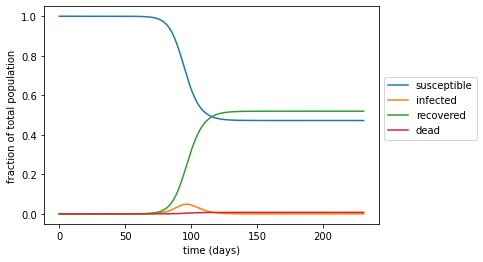

In [24]:
plot_sird(num_times,s,i,r,d)

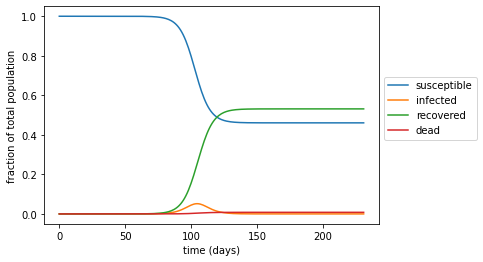

In [25]:
plot_sird(num_times,np.array(S)/us_population,np.array(I)/us_population,np.array(R)/us_population,np.array(D)/us_population)

In [26]:
@tf.function()
def tf_loss_fn_us(y_true, y_pred):
    beta_t = y_pred[0][:,0]
    gamma_t = y_pred[0][:,1]
    mu_t = y_pred[0][:,2]
    
    beta_0 = y_true[0][0,0]
    gamma_0 = y_true[0][0,1]
    mu_0 = y_true[0][0,2]
    
    S = []
    I = []
    R = []
    D = []

    S.append(us_population-1.)
    I.append(1.)
    R.append(0.)
    D.append(0.)
    num_times = len(beta_t)

    for i in range(num_times-1):
        Snew = S[i] - beta_t[i]/us_population * S[i]*I[i]
        Inew = I[i] + beta_t[i]/us_population * S[i]*I[i] - gamma_t[i]*I[i] - mu_t[i]*I[i]
        Rnew = R[i] + gamma_t[i]* I[i]
        Dnew = D[i] + mu_t[i]* I[i]
        S.append(Snew)
        I.append(Inew)
        R.append(Rnew)
        D.append(Dnew)
    I = tf.stack(I)
    D = tf.stack(D)
    epsilon = 0.000001
    Ed1 = tf.math.reduce_sum((tf.math.log((x_trains[0][:,0]+epsilon))-tf.math.log((I+epsilon)))**2 + (tf.math.log((x_trains[0][:,1]+epsilon))-tf.math.log((D+epsilon)))**2)
    
    Ed2 = 0.01*tf.math.log(tf.math.reduce_max(x_trains[0][:,0])+epsilon)/(tf.math.reduce_max(x_trains[0][:,0])+epsilon) * tf.math.reduce_sum((x_trains[0][:,0]-I)**2+ (x_trains[0][:,1]-D)**2)

    sumr = 0
    for it in range(num_times-1):
        sumr = sumr + (beta_t[it]-beta_t[it+1])**2 + (gamma_t[it]-gamma_t[it+1])**2 + 100*(mu_t[it]-mu_t[it+1])**2
    Er = 100*tf.math.log(tf.math.reduce_max(x_trains[0][:,0])+epsilon)/tf.math.reduce_max([beta_0,gamma_0,mu_0])*sumr
    
    E0 = 100*tf.math.log(tf.math.reduce_max(x_trains[0][:,0])+epsilon)/tf.math.reduce_max([beta_0,gamma_0,mu_0])*((beta_t[0]-beta_0)**2+(gamma_t[0]- gamma_0)**2 +100*(mu_t[0]-mu_0)**2)

    return Ed1+Ed2+Er+E0

In [27]:
num_times = 82

In [28]:
def to_float(x):
    return float(x)

to_float_vec = np.vectorize(to_float)

In [29]:
x_train = to_float_vec(np.array([us_infected[0:num_times],us_deaths[0:num_times]]).transpose())
#x_train = tf.constant(x_train,dtype=tf.float32)
num_times = len(x_train)

In [30]:
x_trains = to_float_vec(np.array([x_train]))

In [31]:
num_times

82

In [32]:
tf.keras.backend.set_floatx('float64')

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(num_times, 2)),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(num_times*3,activation = 'sigmoid'),
    tf.keras.layers.Reshape((num_times, 3))
])

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.012),
              loss = 'mean_squared_error',
              metrics=['accuracy']
             )

In [34]:
num_times = num_times
y_true = np.zeros((num_times,3))
y_true[:,0] = beta_0[0:num_times]
y_true[:,1] = gamma_0[0:num_times]
y_true[:,2] = mu_0[0:num_times]

y_trues = np.array([y_true])

In [35]:
model.fit(x_trains,y_trues,verbose=1,epochs=2500)

Epoch 1/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.2683
Epoch 2/2500
1/1 [==============================] - 0s 608us/step - loss: 0.0789 - accuracy: 0.5976
Epoch 3/2500
1/1 [==============================] - 0s 563us/step - loss: 0.0657 - accuracy: 0.8293
Epoch 4/2500
1/1 [==============================] - 0s 551us/step - loss: 0.0546 - accuracy: 0.9512
Epoch 5/2500
1/1 [==============================] - 0s 546us/step - loss: 0.0453 - accuracy: 0.9756
Epoch 6/2500
1/1 [==============================] - 0s 639us/step - loss: 0.0377 - accuracy: 0.9878
Epoch 7/2500
1/1 [==============================] - 0s 607us/step - loss: 0.0313 - accuracy: 1.0000
Epoch 8/2500
1/1 [==============================] - 0s 523us/step - loss: 0.0260 - accuracy: 1.0000
Epoch 9/2500
1/1 [==============================] - 0s 533us/step - loss: 0.0217 - accuracy: 1.0000
Epoch 10/2500
1/1 [==============================] - 0s 535us/step - loss: 0.0181 - accuracy: 1.0000
E

1/1 [==============================] - 0s 732us/step - loss: 1.1014e-04 - accuracy: 1.0000
Epoch 158/2500
1/1 [==============================] - 0s 581us/step - loss: 1.0919e-04 - accuracy: 1.0000
Epoch 159/2500
1/1 [==============================] - 0s 644us/step - loss: 1.0826e-04 - accuracy: 1.0000
Epoch 160/2500
1/1 [==============================] - 0s 597us/step - loss: 1.0734e-04 - accuracy: 1.0000
Epoch 161/2500
1/1 [==============================] - 0s 791us/step - loss: 1.0643e-04 - accuracy: 1.0000
Epoch 162/2500
1/1 [==============================] - 0s 672us/step - loss: 1.0553e-04 - accuracy: 1.0000
Epoch 163/2500
1/1 [==============================] - 0s 579us/step - loss: 1.0464e-04 - accuracy: 1.0000
Epoch 164/2500
1/1 [==============================] - 0s 790us/step - loss: 1.0376e-04 - accuracy: 1.0000
Epoch 165/2500
1/1 [==============================] - 0s 649us/step - loss: 1.0288e-04 - accuracy: 1.0000
Epoch 166/2500
1/1 [==============================] - 0s 692u

1/1 [==============================] - 0s 479us/step - loss: 3.6944e-05 - accuracy: 1.0000
Epoch 312/2500
1/1 [==============================] - 0s 1000us/step - loss: 3.6725e-05 - accuracy: 1.0000
Epoch 313/2500
1/1 [==============================] - 0s 479us/step - loss: 3.6507e-05 - accuracy: 1.0000
Epoch 314/2500
1/1 [==============================] - 0s 468us/step - loss: 3.6292e-05 - accuracy: 1.0000
Epoch 315/2500
1/1 [==============================] - 0s 481us/step - loss: 3.6078e-05 - accuracy: 1.0000
Epoch 316/2500
1/1 [==============================] - 0s 483us/step - loss: 3.5865e-05 - accuracy: 1.0000
Epoch 317/2500
1/1 [==============================] - 0s 679us/step - loss: 3.5655e-05 - accuracy: 1.0000
Epoch 318/2500
1/1 [==============================] - 0s 480us/step - loss: 3.5446e-05 - accuracy: 1.0000
Epoch 319/2500
1/1 [==============================] - 0s 539us/step - loss: 3.5238e-05 - accuracy: 1.0000
Epoch 320/2500
1/1 [==============================] - 0s 605

1/1 [==============================] - 0s 460us/step - loss: 1.6379e-05 - accuracy: 1.0000
Epoch 466/2500
1/1 [==============================] - 0s 468us/step - loss: 1.6302e-05 - accuracy: 1.0000
Epoch 467/2500
1/1 [==============================] - 0s 469us/step - loss: 1.6224e-05 - accuracy: 1.0000
Epoch 468/2500
1/1 [==============================] - 0s 711us/step - loss: 1.6148e-05 - accuracy: 1.0000
Epoch 469/2500
1/1 [==============================] - 0s 482us/step - loss: 1.6072e-05 - accuracy: 1.0000
Epoch 470/2500
1/1 [==============================] - 0s 474us/step - loss: 1.5996e-05 - accuracy: 1.0000
Epoch 471/2500
1/1 [==============================] - 0s 933us/step - loss: 1.5920e-05 - accuracy: 1.0000
Epoch 472/2500
1/1 [==============================] - 0s 963us/step - loss: 1.5845e-05 - accuracy: 1.0000
Epoch 473/2500
1/1 [==============================] - 0s 471us/step - loss: 1.5771e-05 - accuracy: 1.0000
Epoch 474/2500
1/1 [==============================] - 0s 472u

1/1 [==============================] - 0s 516us/step - loss: 8.3076e-06 - accuracy: 1.0000
Epoch 620/2500
1/1 [==============================] - 0s 479us/step - loss: 8.2734e-06 - accuracy: 1.0000
Epoch 621/2500
1/1 [==============================] - 0s 465us/step - loss: 8.2394e-06 - accuracy: 1.0000
Epoch 622/2500
1/1 [==============================] - 0s 489us/step - loss: 8.2055e-06 - accuracy: 1.0000
Epoch 623/2500
1/1 [==============================] - 0s 491us/step - loss: 8.1718e-06 - accuracy: 1.0000
Epoch 624/2500
1/1 [==============================] - 0s 541us/step - loss: 8.1383e-06 - accuracy: 1.0000
Epoch 625/2500
1/1 [==============================] - 0s 534us/step - loss: 8.1049e-06 - accuracy: 1.0000
Epoch 626/2500
1/1 [==============================] - 0s 462us/step - loss: 8.0717e-06 - accuracy: 1.0000
Epoch 627/2500
1/1 [==============================] - 0s 471us/step - loss: 8.0386e-06 - accuracy: 1.0000
Epoch 628/2500
1/1 [==============================] - 0s 466u

1/1 [==============================] - 0s 556us/step - loss: 4.5344e-06 - accuracy: 1.0000
Epoch 774/2500
1/1 [==============================] - 0s 600us/step - loss: 4.5173e-06 - accuracy: 1.0000
Epoch 775/2500
1/1 [==============================] - 0s 591us/step - loss: 4.5003e-06 - accuracy: 1.0000
Epoch 776/2500
1/1 [==============================] - 0s 514us/step - loss: 4.4834e-06 - accuracy: 1.0000
Epoch 777/2500
1/1 [==============================] - 0s 662us/step - loss: 4.4666e-06 - accuracy: 1.0000
Epoch 778/2500
1/1 [==============================] - 0s 547us/step - loss: 4.4498e-06 - accuracy: 1.0000
Epoch 779/2500
1/1 [==============================] - 0s 611us/step - loss: 4.4331e-06 - accuracy: 1.0000
Epoch 780/2500
1/1 [==============================] - 0s 511us/step - loss: 4.4165e-06 - accuracy: 1.0000
Epoch 781/2500
1/1 [==============================] - 0s 584us/step - loss: 4.3999e-06 - accuracy: 1.0000
Epoch 782/2500
1/1 [==============================] - 0s 606u

1/1 [==============================] - 0s 475us/step - loss: 2.5810e-06 - accuracy: 1.0000
Epoch 928/2500
1/1 [==============================] - 0s 477us/step - loss: 2.5719e-06 - accuracy: 1.0000
Epoch 929/2500
1/1 [==============================] - 0s 479us/step - loss: 2.5627e-06 - accuracy: 1.0000
Epoch 930/2500
1/1 [==============================] - 0s 489us/step - loss: 2.5536e-06 - accuracy: 1.0000
Epoch 931/2500
1/1 [==============================] - 0s 589us/step - loss: 2.5445e-06 - accuracy: 1.0000
Epoch 932/2500
1/1 [==============================] - 0s 459us/step - loss: 2.5354e-06 - accuracy: 1.0000
Epoch 933/2500
1/1 [==============================] - 0s 504us/step - loss: 2.5264e-06 - accuracy: 1.0000
Epoch 934/2500
1/1 [==============================] - 0s 527us/step - loss: 2.5174e-06 - accuracy: 1.0000
Epoch 935/2500
1/1 [==============================] - 0s 595us/step - loss: 2.5085e-06 - accuracy: 1.0000
Epoch 936/2500
1/1 [==============================] - 0s 473u

1/1 [==============================] - 0s 812us/step - loss: 1.5090e-06 - accuracy: 1.0000
Epoch 1081/2500
1/1 [==============================] - 0s 587us/step - loss: 1.5038e-06 - accuracy: 1.0000
Epoch 1082/2500
1/1 [==============================] - 0s 662us/step - loss: 1.4986e-06 - accuracy: 1.0000
Epoch 1083/2500
1/1 [==============================] - 0s 507us/step - loss: 1.4934e-06 - accuracy: 1.0000
Epoch 1084/2500
1/1 [==============================] - 0s 510us/step - loss: 1.4883e-06 - accuracy: 1.0000
Epoch 1085/2500
1/1 [==============================] - 0s 515us/step - loss: 1.4831e-06 - accuracy: 1.0000
Epoch 1086/2500
1/1 [==============================] - 0s 508us/step - loss: 1.4780e-06 - accuracy: 1.0000
Epoch 1087/2500
1/1 [==============================] - 0s 709us/step - loss: 1.4729e-06 - accuracy: 1.0000
Epoch 1088/2500
1/1 [==============================] - 0s 546us/step - loss: 1.4678e-06 - accuracy: 1.0000
Epoch 1089/2500
1/1 [==============================] 

1/1 [==============================] - 0s 458us/step - loss: 9.3341e-07 - accuracy: 1.0000
Epoch 1233/2500
1/1 [==============================] - 0s 448us/step - loss: 9.8227e-07 - accuracy: 1.0000
Epoch 1234/2500
1/1 [==============================] - 0s 563us/step - loss: 1.0742e-06 - accuracy: 1.0000
Epoch 1235/2500
1/1 [==============================] - 0s 556us/step - loss: 1.2029e-06 - accuracy: 1.0000
Epoch 1236/2500
1/1 [==============================] - 0s 559us/step - loss: 1.2092e-06 - accuracy: 1.0000
Epoch 1237/2500
1/1 [==============================] - 0s 487us/step - loss: 1.1009e-06 - accuracy: 1.0000
Epoch 1238/2500
1/1 [==============================] - 0s 756us/step - loss: 1.1317e-06 - accuracy: 1.0000
Epoch 1239/2500
1/1 [==============================] - 0s 590us/step - loss: 1.4481e-06 - accuracy: 1.0000
Epoch 1240/2500
1/1 [==============================] - 0s 521us/step - loss: 1.5885e-06 - accuracy: 1.0000
Epoch 1241/2500
1/1 [==============================] 

1/1 [==============================] - 0s 523us/step - loss: 5.3453e-07 - accuracy: 1.0000
Epoch 1385/2500
1/1 [==============================] - 0s 624us/step - loss: 5.6225e-07 - accuracy: 1.0000
Epoch 1386/2500
1/1 [==============================] - 0s 532us/step - loss: 5.3355e-07 - accuracy: 1.0000
Epoch 1387/2500
1/1 [==============================] - 0s 546us/step - loss: 5.4644e-07 - accuracy: 1.0000
Epoch 1388/2500
1/1 [==============================] - 0s 626us/step - loss: 5.3637e-07 - accuracy: 1.0000
Epoch 1389/2500
1/1 [==============================] - 0s 554us/step - loss: 5.3269e-07 - accuracy: 1.0000
Epoch 1390/2500
1/1 [==============================] - 0s 960us/step - loss: 5.3500e-07 - accuracy: 1.0000
Epoch 1391/2500
1/1 [==============================] - 0s 602us/step - loss: 5.2411e-07 - accuracy: 1.0000
Epoch 1392/2500
1/1 [==============================] - 0s 534us/step - loss: 5.3163e-07 - accuracy: 1.0000
Epoch 1393/2500
1/1 [==============================] 

1/1 [==============================] - 0s 462us/step - loss: 3.1476e-07 - accuracy: 1.0000
Epoch 1537/2500
1/1 [==============================] - 0s 459us/step - loss: 3.1366e-07 - accuracy: 1.0000
Epoch 1538/2500
1/1 [==============================] - 0s 479us/step - loss: 3.1257e-07 - accuracy: 1.0000
Epoch 1539/2500
1/1 [==============================] - 0s 448us/step - loss: 3.1149e-07 - accuracy: 1.0000
Epoch 1540/2500
1/1 [==============================] - 0s 456us/step - loss: 3.1040e-07 - accuracy: 1.0000
Epoch 1541/2500
1/1 [==============================] - 0s 453us/step - loss: 3.0932e-07 - accuracy: 1.0000
Epoch 1542/2500
1/1 [==============================] - 0s 496us/step - loss: 3.0825e-07 - accuracy: 1.0000
Epoch 1543/2500
1/1 [==============================] - 0s 464us/step - loss: 3.0718e-07 - accuracy: 1.0000
Epoch 1544/2500
1/1 [==============================] - 0s 558us/step - loss: 3.0611e-07 - accuracy: 1.0000
Epoch 1545/2500
1/1 [==============================] 

1/1 [==============================] - 0s 456us/step - loss: 2.1548e-07 - accuracy: 1.0000
Epoch 1689/2500
1/1 [==============================] - 0s 453us/step - loss: 1.9983e-07 - accuracy: 1.0000
Epoch 1690/2500
1/1 [==============================] - 0s 458us/step - loss: 2.0819e-07 - accuracy: 1.0000
Epoch 1691/2500
1/1 [==============================] - 0s 483us/step - loss: 1.8971e-07 - accuracy: 1.0000
Epoch 1692/2500
1/1 [==============================] - 0s 465us/step - loss: 2.0404e-07 - accuracy: 1.0000
Epoch 1693/2500
1/1 [==============================] - 0s 562us/step - loss: 1.9247e-07 - accuracy: 1.0000
Epoch 1694/2500
1/1 [==============================] - 0s 460us/step - loss: 1.9082e-07 - accuracy: 1.0000
Epoch 1695/2500
1/1 [==============================] - 0s 576us/step - loss: 1.9223e-07 - accuracy: 1.0000
Epoch 1696/2500
1/1 [==============================] - 0s 522us/step - loss: 1.8954e-07 - accuracy: 1.0000
Epoch 1697/2500
1/1 [==============================] 

1/1 [==============================] - 0s 703us/step - loss: 1.0685e-07 - accuracy: 1.0000
Epoch 1841/2500
1/1 [==============================] - 0s 570us/step - loss: 1.1330e-07 - accuracy: 1.0000
Epoch 1842/2500
1/1 [==============================] - 0s 614us/step - loss: 1.1890e-07 - accuracy: 1.0000
Epoch 1843/2500
1/1 [==============================] - 0s 614us/step - loss: 1.0859e-07 - accuracy: 1.0000
Epoch 1844/2500
1/1 [==============================] - 0s 969us/step - loss: 1.0656e-07 - accuracy: 1.0000
Epoch 1845/2500
1/1 [==============================] - 0s 882us/step - loss: 1.1398e-07 - accuracy: 1.0000
Epoch 1846/2500
1/1 [==============================] - 0s 601us/step - loss: 1.1080e-07 - accuracy: 1.0000
Epoch 1847/2500
1/1 [==============================] - 0s 645us/step - loss: 1.0620e-07 - accuracy: 1.0000
Epoch 1848/2500
1/1 [==============================] - 0s 534us/step - loss: 1.1336e-07 - accuracy: 1.0000
Epoch 1849/2500
1/1 [==============================] 

1/1 [==============================] - 0s 696us/step - loss: 9.0834e-08 - accuracy: 1.0000
Epoch 1993/2500
1/1 [==============================] - 0s 537us/step - loss: 7.8395e-08 - accuracy: 1.0000
Epoch 1994/2500
1/1 [==============================] - 0s 515us/step - loss: 6.6404e-08 - accuracy: 1.0000
Epoch 1995/2500
1/1 [==============================] - 0s 547us/step - loss: 7.9644e-08 - accuracy: 1.0000
Epoch 1996/2500
1/1 [==============================] - 0s 603us/step - loss: 7.3693e-08 - accuracy: 1.0000
Epoch 1997/2500
1/1 [==============================] - 0s 533us/step - loss: 6.6962e-08 - accuracy: 1.0000
Epoch 1998/2500
1/1 [==============================] - 0s 844us/step - loss: 6.9147e-08 - accuracy: 1.0000
Epoch 1999/2500
1/1 [==============================] - 0s 690us/step - loss: 7.0864e-08 - accuracy: 1.0000
Epoch 2000/2500
1/1 [==============================] - 0s 635us/step - loss: 6.5262e-08 - accuracy: 1.0000
Epoch 2001/2500
1/1 [==============================] 

1/1 [==============================] - 0s 466us/step - loss: 1.3016e-06 - accuracy: 1.0000
Epoch 2145/2500
1/1 [==============================] - 0s 481us/step - loss: 5.5247e-07 - accuracy: 1.0000
Epoch 2146/2500
1/1 [==============================] - 0s 647us/step - loss: 2.6720e-07 - accuracy: 1.0000
Epoch 2147/2500
1/1 [==============================] - 0s 549us/step - loss: 1.0391e-06 - accuracy: 1.0000
Epoch 2148/2500
1/1 [==============================] - 0s 620us/step - loss: 2.0931e-07 - accuracy: 1.0000
Epoch 2149/2500
1/1 [==============================] - 0s 583us/step - loss: 1.4094e-06 - accuracy: 1.0000
Epoch 2150/2500
1/1 [==============================] - 0s 651us/step - loss: 6.7570e-06 - accuracy: 1.0000
Epoch 2151/2500
1/1 [==============================] - 0s 541us/step - loss: 2.0913e-06 - accuracy: 1.0000
Epoch 2152/2500
1/1 [==============================] - 0s 537us/step - loss: 3.0733e-06 - accuracy: 1.0000
Epoch 2153/2500
1/1 [==============================] 

1/1 [==============================] - 0s 552us/step - loss: 5.3743e-08 - accuracy: 1.0000
Epoch 2297/2500
1/1 [==============================] - 0s 543us/step - loss: 1.3112e-07 - accuracy: 1.0000
Epoch 2298/2500
1/1 [==============================] - 0s 535us/step - loss: 4.6154e-08 - accuracy: 1.0000
Epoch 2299/2500
1/1 [==============================] - 0s 646us/step - loss: 1.0988e-07 - accuracy: 1.0000
Epoch 2300/2500
1/1 [==============================] - 0s 3ms/step - loss: 4.7675e-08 - accuracy: 1.0000
Epoch 2301/2500
1/1 [==============================] - 0s 994us/step - loss: 8.1658e-08 - accuracy: 1.0000
Epoch 2302/2500
1/1 [==============================] - 0s 772us/step - loss: 4.7403e-08 - accuracy: 1.0000
Epoch 2303/2500
1/1 [==============================] - 0s 564us/step - loss: 6.8534e-08 - accuracy: 1.0000
Epoch 2304/2500
1/1 [==============================] - 0s 541us/step - loss: 4.3537e-08 - accuracy: 1.0000
Epoch 2305/2500
1/1 [==============================] - 

1/1 [==============================] - 0s 696us/step - loss: 4.7741e-07 - accuracy: 1.0000
Epoch 2449/2500
1/1 [==============================] - 0s 803us/step - loss: 5.1643e-07 - accuracy: 1.0000
Epoch 2450/2500
1/1 [==============================] - 0s 691us/step - loss: 1.9804e-07 - accuracy: 1.0000
Epoch 2451/2500
1/1 [==============================] - 0s 599us/step - loss: 3.6282e-07 - accuracy: 1.0000
Epoch 2452/2500
1/1 [==============================] - 0s 619us/step - loss: 4.5975e-07 - accuracy: 1.0000
Epoch 2453/2500
1/1 [==============================] - 0s 518us/step - loss: 5.3660e-07 - accuracy: 1.0000
Epoch 2454/2500
1/1 [==============================] - 0s 521us/step - loss: 3.7236e-07 - accuracy: 1.0000
Epoch 2455/2500
1/1 [==============================] - 0s 636us/step - loss: 2.1660e-07 - accuracy: 1.0000
Epoch 2456/2500
1/1 [==============================] - 0s 907us/step - loss: 2.4536e-07 - accuracy: 1.0000
Epoch 2457/2500
1/1 [==============================] 

In [36]:
model(np.array([x_train]))[0]

<tf.Tensor: shape=(82, 3), dtype=float64, numpy=
array([[0.63453012, 0.43979856, 0.00672737],
       [0.63453012, 0.43979856, 0.00679412],
       [0.63453012, 0.43979856, 0.00678258],
       [0.63453012, 0.43979856, 0.00673265],
       [0.63453012, 0.43979856, 0.00684546],
       [0.63453012, 0.43979856, 0.00680184],
       [0.63453012, 0.439573  , 0.00671815],
       [0.63453012, 0.43979856, 0.00667613],
       [0.63453012, 0.43979856, 0.00680809],
       [0.63453012, 0.43979856, 0.00674848],
       [0.63453012, 0.43979856, 0.00689359],
       [0.63453012, 0.43979856, 0.00687749],
       [0.63453012, 0.43979856, 0.00670128],
       [0.63453012, 0.44551889, 0.00687185],
       [0.63453012, 0.43979856, 0.00685811],
       [0.63453012, 0.43979856, 0.00668873],
       [0.63453012, 0.43979856, 0.00671169],
       [0.63453012, 0.43979856, 0.00679721],
       [0.63453012, 0.43979856, 0.00666313],
       [0.63453012, 0.43979856, 0.00684801],
       [0.63453012, 0.43979856, 0.0068939 ],
      

In [37]:
tf.config.experimental_run_functions_eagerly(False)

In [38]:
#model = tf.keras.models.load_model('discrete_new_model_temp0')

In [39]:
#tf_predictions = tf.constant(predictions,dtype = tf.float32)

err = tf_loss_fn_us(y_trues,model(x_trains))
print(err)

tf.Tensor(223093.4593828625, shape=(), dtype=float64)


In [40]:
images = x_trains;
labels = y_trues

In [41]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = model(x_trains, training=True)
    
        # Add asserts to check the shape of the output.
        #tf.debugging.assert_equal(logits.shape, (32, 10))
    
        loss_value = loss_object(labels, logits)
    loss_history.append(loss_value)
    grads = tape.gradient(loss_value, model.trainable_variables)
    #print(grads)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),experimental_aggregate_gradients=True)


In [42]:
def train(epochs):
    for epoch in range(epochs):
        train_step(images, labels)
        print ('Epoch {} finished'.format(epoch))


In [43]:
#model = tf.keras.models.load_model('2020_09_10_232temp')

In [44]:
loss_history = []

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005)
loss_object = tf_loss_fn_us
train(epochs =10000)
np_loss_history = []
for loss in loss_history:
    np_loss_history.append(loss.numpy())

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished
Epoch 30 finished
Epoch 31 finished
Epoch 32 finished
Epoch 33 finished
Epoch 34 finished
Epoch 35 finished
Epoch 36 finished
Epoch 37 finished
Epoch 38 finished
Epoch 39 finished
Epoch 40 finished
Epoch 41 finished
Epoch 42 finished
Epoch 43 finished
Epoch 44 finished
Epoch 45 finished
Epoch 46 finished
Epoch 47 finished
Epoch 48 finished
Epoch 49 finished
Epoch 50 finished
Epoch 51 finished
Epoch 52 finished
Epoch 53 finished
Epoch 54 finished
Epoch 55 finished
Ep

Epoch 437 finished
Epoch 438 finished
Epoch 439 finished
Epoch 440 finished
Epoch 441 finished
Epoch 442 finished
Epoch 443 finished
Epoch 444 finished
Epoch 445 finished
Epoch 446 finished
Epoch 447 finished
Epoch 448 finished
Epoch 449 finished
Epoch 450 finished
Epoch 451 finished
Epoch 452 finished
Epoch 453 finished
Epoch 454 finished
Epoch 455 finished
Epoch 456 finished
Epoch 457 finished
Epoch 458 finished
Epoch 459 finished
Epoch 460 finished
Epoch 461 finished
Epoch 462 finished
Epoch 463 finished
Epoch 464 finished
Epoch 465 finished
Epoch 466 finished
Epoch 467 finished
Epoch 468 finished
Epoch 469 finished
Epoch 470 finished
Epoch 471 finished
Epoch 472 finished
Epoch 473 finished
Epoch 474 finished
Epoch 475 finished
Epoch 476 finished
Epoch 477 finished
Epoch 478 finished
Epoch 479 finished
Epoch 480 finished
Epoch 481 finished
Epoch 482 finished
Epoch 483 finished
Epoch 484 finished
Epoch 485 finished
Epoch 486 finished
Epoch 487 finished
Epoch 488 finished
Epoch 489 fi

Epoch 872 finished
Epoch 873 finished
Epoch 874 finished
Epoch 875 finished
Epoch 876 finished
Epoch 877 finished
Epoch 878 finished
Epoch 879 finished
Epoch 880 finished
Epoch 881 finished
Epoch 882 finished
Epoch 883 finished
Epoch 884 finished
Epoch 885 finished
Epoch 886 finished
Epoch 887 finished
Epoch 888 finished
Epoch 889 finished
Epoch 890 finished
Epoch 891 finished
Epoch 892 finished
Epoch 893 finished
Epoch 894 finished
Epoch 895 finished
Epoch 896 finished
Epoch 897 finished
Epoch 898 finished
Epoch 899 finished
Epoch 900 finished
Epoch 901 finished
Epoch 902 finished
Epoch 903 finished
Epoch 904 finished
Epoch 905 finished
Epoch 906 finished
Epoch 907 finished
Epoch 908 finished
Epoch 909 finished
Epoch 910 finished
Epoch 911 finished
Epoch 912 finished
Epoch 913 finished
Epoch 914 finished
Epoch 915 finished
Epoch 916 finished
Epoch 917 finished
Epoch 918 finished
Epoch 919 finished
Epoch 920 finished
Epoch 921 finished
Epoch 922 finished
Epoch 923 finished
Epoch 924 fi

Epoch 1293 finished
Epoch 1294 finished
Epoch 1295 finished
Epoch 1296 finished
Epoch 1297 finished
Epoch 1298 finished
Epoch 1299 finished
Epoch 1300 finished
Epoch 1301 finished
Epoch 1302 finished
Epoch 1303 finished
Epoch 1304 finished
Epoch 1305 finished
Epoch 1306 finished
Epoch 1307 finished
Epoch 1308 finished
Epoch 1309 finished
Epoch 1310 finished
Epoch 1311 finished
Epoch 1312 finished
Epoch 1313 finished
Epoch 1314 finished
Epoch 1315 finished
Epoch 1316 finished
Epoch 1317 finished
Epoch 1318 finished
Epoch 1319 finished
Epoch 1320 finished
Epoch 1321 finished
Epoch 1322 finished
Epoch 1323 finished
Epoch 1324 finished
Epoch 1325 finished
Epoch 1326 finished
Epoch 1327 finished
Epoch 1328 finished
Epoch 1329 finished
Epoch 1330 finished
Epoch 1331 finished
Epoch 1332 finished
Epoch 1333 finished
Epoch 1334 finished
Epoch 1335 finished
Epoch 1336 finished
Epoch 1337 finished
Epoch 1338 finished
Epoch 1339 finished
Epoch 1340 finished
Epoch 1341 finished
Epoch 1342 finished


Epoch 1707 finished
Epoch 1708 finished
Epoch 1709 finished
Epoch 1710 finished
Epoch 1711 finished
Epoch 1712 finished
Epoch 1713 finished
Epoch 1714 finished
Epoch 1715 finished
Epoch 1716 finished
Epoch 1717 finished
Epoch 1718 finished
Epoch 1719 finished
Epoch 1720 finished
Epoch 1721 finished
Epoch 1722 finished
Epoch 1723 finished
Epoch 1724 finished
Epoch 1725 finished
Epoch 1726 finished
Epoch 1727 finished
Epoch 1728 finished
Epoch 1729 finished
Epoch 1730 finished
Epoch 1731 finished
Epoch 1732 finished
Epoch 1733 finished
Epoch 1734 finished
Epoch 1735 finished
Epoch 1736 finished
Epoch 1737 finished
Epoch 1738 finished
Epoch 1739 finished
Epoch 1740 finished
Epoch 1741 finished
Epoch 1742 finished
Epoch 1743 finished
Epoch 1744 finished
Epoch 1745 finished
Epoch 1746 finished
Epoch 1747 finished
Epoch 1748 finished
Epoch 1749 finished
Epoch 1750 finished
Epoch 1751 finished
Epoch 1752 finished
Epoch 1753 finished
Epoch 1754 finished
Epoch 1755 finished
Epoch 1756 finished


Epoch 2117 finished
Epoch 2118 finished
Epoch 2119 finished
Epoch 2120 finished
Epoch 2121 finished
Epoch 2122 finished
Epoch 2123 finished
Epoch 2124 finished
Epoch 2125 finished
Epoch 2126 finished
Epoch 2127 finished
Epoch 2128 finished
Epoch 2129 finished
Epoch 2130 finished
Epoch 2131 finished
Epoch 2132 finished
Epoch 2133 finished
Epoch 2134 finished
Epoch 2135 finished
Epoch 2136 finished
Epoch 2137 finished
Epoch 2138 finished
Epoch 2139 finished
Epoch 2140 finished
Epoch 2141 finished
Epoch 2142 finished
Epoch 2143 finished
Epoch 2144 finished
Epoch 2145 finished
Epoch 2146 finished
Epoch 2147 finished
Epoch 2148 finished
Epoch 2149 finished
Epoch 2150 finished
Epoch 2151 finished
Epoch 2152 finished
Epoch 2153 finished
Epoch 2154 finished
Epoch 2155 finished
Epoch 2156 finished
Epoch 2157 finished
Epoch 2158 finished
Epoch 2159 finished
Epoch 2160 finished
Epoch 2161 finished
Epoch 2162 finished
Epoch 2163 finished
Epoch 2164 finished
Epoch 2165 finished
Epoch 2166 finished


Epoch 2531 finished
Epoch 2532 finished
Epoch 2533 finished
Epoch 2534 finished
Epoch 2535 finished
Epoch 2536 finished
Epoch 2537 finished
Epoch 2538 finished
Epoch 2539 finished
Epoch 2540 finished
Epoch 2541 finished
Epoch 2542 finished
Epoch 2543 finished
Epoch 2544 finished
Epoch 2545 finished
Epoch 2546 finished
Epoch 2547 finished
Epoch 2548 finished
Epoch 2549 finished
Epoch 2550 finished
Epoch 2551 finished
Epoch 2552 finished
Epoch 2553 finished
Epoch 2554 finished
Epoch 2555 finished
Epoch 2556 finished
Epoch 2557 finished
Epoch 2558 finished
Epoch 2559 finished
Epoch 2560 finished
Epoch 2561 finished
Epoch 2562 finished
Epoch 2563 finished
Epoch 2564 finished
Epoch 2565 finished
Epoch 2566 finished
Epoch 2567 finished
Epoch 2568 finished
Epoch 2569 finished
Epoch 2570 finished
Epoch 2571 finished
Epoch 2572 finished
Epoch 2573 finished
Epoch 2574 finished
Epoch 2575 finished
Epoch 2576 finished
Epoch 2577 finished
Epoch 2578 finished
Epoch 2579 finished
Epoch 2580 finished


Epoch 2941 finished
Epoch 2942 finished
Epoch 2943 finished
Epoch 2944 finished
Epoch 2945 finished
Epoch 2946 finished
Epoch 2947 finished
Epoch 2948 finished
Epoch 2949 finished
Epoch 2950 finished
Epoch 2951 finished
Epoch 2952 finished
Epoch 2953 finished
Epoch 2954 finished
Epoch 2955 finished
Epoch 2956 finished
Epoch 2957 finished
Epoch 2958 finished
Epoch 2959 finished
Epoch 2960 finished
Epoch 2961 finished
Epoch 2962 finished
Epoch 2963 finished
Epoch 2964 finished
Epoch 2965 finished
Epoch 2966 finished
Epoch 2967 finished
Epoch 2968 finished
Epoch 2969 finished
Epoch 2970 finished
Epoch 2971 finished
Epoch 2972 finished
Epoch 2973 finished
Epoch 2974 finished
Epoch 2975 finished
Epoch 2976 finished
Epoch 2977 finished
Epoch 2978 finished
Epoch 2979 finished
Epoch 2980 finished
Epoch 2981 finished
Epoch 2982 finished
Epoch 2983 finished
Epoch 2984 finished
Epoch 2985 finished
Epoch 2986 finished
Epoch 2987 finished
Epoch 2988 finished
Epoch 2989 finished
Epoch 2990 finished


Epoch 3351 finished
Epoch 3352 finished
Epoch 3353 finished
Epoch 3354 finished
Epoch 3355 finished
Epoch 3356 finished
Epoch 3357 finished
Epoch 3358 finished
Epoch 3359 finished
Epoch 3360 finished
Epoch 3361 finished
Epoch 3362 finished
Epoch 3363 finished
Epoch 3364 finished
Epoch 3365 finished
Epoch 3366 finished
Epoch 3367 finished
Epoch 3368 finished
Epoch 3369 finished
Epoch 3370 finished
Epoch 3371 finished
Epoch 3372 finished
Epoch 3373 finished
Epoch 3374 finished
Epoch 3375 finished
Epoch 3376 finished
Epoch 3377 finished
Epoch 3378 finished
Epoch 3379 finished
Epoch 3380 finished
Epoch 3381 finished
Epoch 3382 finished
Epoch 3383 finished
Epoch 3384 finished
Epoch 3385 finished
Epoch 3386 finished
Epoch 3387 finished
Epoch 3388 finished
Epoch 3389 finished
Epoch 3390 finished
Epoch 3391 finished
Epoch 3392 finished
Epoch 3393 finished
Epoch 3394 finished
Epoch 3395 finished
Epoch 3396 finished
Epoch 3397 finished
Epoch 3398 finished
Epoch 3399 finished
Epoch 3400 finished


Epoch 3762 finished
Epoch 3763 finished
Epoch 3764 finished
Epoch 3765 finished
Epoch 3766 finished
Epoch 3767 finished
Epoch 3768 finished
Epoch 3769 finished
Epoch 3770 finished
Epoch 3771 finished
Epoch 3772 finished
Epoch 3773 finished
Epoch 3774 finished
Epoch 3775 finished
Epoch 3776 finished
Epoch 3777 finished
Epoch 3778 finished
Epoch 3779 finished
Epoch 3780 finished
Epoch 3781 finished
Epoch 3782 finished
Epoch 3783 finished
Epoch 3784 finished
Epoch 3785 finished
Epoch 3786 finished
Epoch 3787 finished
Epoch 3788 finished
Epoch 3789 finished
Epoch 3790 finished
Epoch 3791 finished
Epoch 3792 finished
Epoch 3793 finished
Epoch 3794 finished
Epoch 3795 finished
Epoch 3796 finished
Epoch 3797 finished
Epoch 3798 finished
Epoch 3799 finished
Epoch 3800 finished
Epoch 3801 finished
Epoch 3802 finished
Epoch 3803 finished
Epoch 3804 finished
Epoch 3805 finished
Epoch 3806 finished
Epoch 3807 finished
Epoch 3808 finished
Epoch 3809 finished
Epoch 3810 finished
Epoch 3811 finished


Epoch 4172 finished
Epoch 4173 finished
Epoch 4174 finished
Epoch 4175 finished
Epoch 4176 finished
Epoch 4177 finished
Epoch 4178 finished
Epoch 4179 finished
Epoch 4180 finished
Epoch 4181 finished
Epoch 4182 finished
Epoch 4183 finished
Epoch 4184 finished
Epoch 4185 finished
Epoch 4186 finished
Epoch 4187 finished
Epoch 4188 finished
Epoch 4189 finished
Epoch 4190 finished
Epoch 4191 finished
Epoch 4192 finished
Epoch 4193 finished
Epoch 4194 finished
Epoch 4195 finished
Epoch 4196 finished
Epoch 4197 finished
Epoch 4198 finished
Epoch 4199 finished
Epoch 4200 finished
Epoch 4201 finished
Epoch 4202 finished
Epoch 4203 finished
Epoch 4204 finished
Epoch 4205 finished
Epoch 4206 finished
Epoch 4207 finished
Epoch 4208 finished
Epoch 4209 finished
Epoch 4210 finished
Epoch 4211 finished
Epoch 4212 finished
Epoch 4213 finished
Epoch 4214 finished
Epoch 4215 finished
Epoch 4216 finished
Epoch 4217 finished
Epoch 4218 finished
Epoch 4219 finished
Epoch 4220 finished
Epoch 4221 finished


Epoch 4588 finished
Epoch 4589 finished
Epoch 4590 finished
Epoch 4591 finished
Epoch 4592 finished
Epoch 4593 finished
Epoch 4594 finished
Epoch 4595 finished
Epoch 4596 finished
Epoch 4597 finished
Epoch 4598 finished
Epoch 4599 finished
Epoch 4600 finished
Epoch 4601 finished
Epoch 4602 finished
Epoch 4603 finished
Epoch 4604 finished
Epoch 4605 finished
Epoch 4606 finished
Epoch 4607 finished
Epoch 4608 finished
Epoch 4609 finished
Epoch 4610 finished
Epoch 4611 finished
Epoch 4612 finished
Epoch 4613 finished
Epoch 4614 finished
Epoch 4615 finished
Epoch 4616 finished
Epoch 4617 finished
Epoch 4618 finished
Epoch 4619 finished
Epoch 4620 finished
Epoch 4621 finished
Epoch 4622 finished
Epoch 4623 finished
Epoch 4624 finished
Epoch 4625 finished
Epoch 4626 finished
Epoch 4627 finished
Epoch 4628 finished
Epoch 4629 finished
Epoch 4630 finished
Epoch 4631 finished
Epoch 4632 finished
Epoch 4633 finished
Epoch 4634 finished
Epoch 4635 finished
Epoch 4636 finished
Epoch 4637 finished


Epoch 5003 finished
Epoch 5004 finished
Epoch 5005 finished
Epoch 5006 finished
Epoch 5007 finished
Epoch 5008 finished
Epoch 5009 finished
Epoch 5010 finished
Epoch 5011 finished
Epoch 5012 finished
Epoch 5013 finished
Epoch 5014 finished
Epoch 5015 finished
Epoch 5016 finished
Epoch 5017 finished
Epoch 5018 finished
Epoch 5019 finished
Epoch 5020 finished
Epoch 5021 finished
Epoch 5022 finished
Epoch 5023 finished
Epoch 5024 finished
Epoch 5025 finished
Epoch 5026 finished
Epoch 5027 finished
Epoch 5028 finished
Epoch 5029 finished
Epoch 5030 finished
Epoch 5031 finished
Epoch 5032 finished
Epoch 5033 finished
Epoch 5034 finished
Epoch 5035 finished
Epoch 5036 finished
Epoch 5037 finished
Epoch 5038 finished
Epoch 5039 finished
Epoch 5040 finished
Epoch 5041 finished
Epoch 5042 finished
Epoch 5043 finished
Epoch 5044 finished
Epoch 5045 finished
Epoch 5046 finished
Epoch 5047 finished
Epoch 5048 finished
Epoch 5049 finished
Epoch 5050 finished
Epoch 5051 finished
Epoch 5052 finished


Epoch 5415 finished
Epoch 5416 finished
Epoch 5417 finished
Epoch 5418 finished
Epoch 5419 finished
Epoch 5420 finished
Epoch 5421 finished
Epoch 5422 finished
Epoch 5423 finished
Epoch 5424 finished
Epoch 5425 finished
Epoch 5426 finished
Epoch 5427 finished
Epoch 5428 finished
Epoch 5429 finished
Epoch 5430 finished
Epoch 5431 finished
Epoch 5432 finished
Epoch 5433 finished
Epoch 5434 finished
Epoch 5435 finished
Epoch 5436 finished
Epoch 5437 finished
Epoch 5438 finished
Epoch 5439 finished
Epoch 5440 finished
Epoch 5441 finished
Epoch 5442 finished
Epoch 5443 finished
Epoch 5444 finished
Epoch 5445 finished
Epoch 5446 finished
Epoch 5447 finished
Epoch 5448 finished
Epoch 5449 finished
Epoch 5450 finished
Epoch 5451 finished
Epoch 5452 finished
Epoch 5453 finished
Epoch 5454 finished
Epoch 5455 finished
Epoch 5456 finished
Epoch 5457 finished
Epoch 5458 finished
Epoch 5459 finished
Epoch 5460 finished
Epoch 5461 finished
Epoch 5462 finished
Epoch 5463 finished
Epoch 5464 finished


Epoch 5831 finished
Epoch 5832 finished
Epoch 5833 finished
Epoch 5834 finished
Epoch 5835 finished
Epoch 5836 finished
Epoch 5837 finished
Epoch 5838 finished
Epoch 5839 finished
Epoch 5840 finished
Epoch 5841 finished
Epoch 5842 finished
Epoch 5843 finished
Epoch 5844 finished
Epoch 5845 finished
Epoch 5846 finished
Epoch 5847 finished
Epoch 5848 finished
Epoch 5849 finished
Epoch 5850 finished
Epoch 5851 finished
Epoch 5852 finished
Epoch 5853 finished
Epoch 5854 finished
Epoch 5855 finished
Epoch 5856 finished
Epoch 5857 finished
Epoch 5858 finished
Epoch 5859 finished
Epoch 5860 finished
Epoch 5861 finished
Epoch 5862 finished
Epoch 5863 finished
Epoch 5864 finished
Epoch 5865 finished
Epoch 5866 finished
Epoch 5867 finished
Epoch 5868 finished
Epoch 5869 finished
Epoch 5870 finished
Epoch 5871 finished
Epoch 5872 finished
Epoch 5873 finished
Epoch 5874 finished
Epoch 5875 finished
Epoch 5876 finished
Epoch 5877 finished
Epoch 5878 finished
Epoch 5879 finished
Epoch 5880 finished


Epoch 6241 finished
Epoch 6242 finished
Epoch 6243 finished
Epoch 6244 finished
Epoch 6245 finished
Epoch 6246 finished
Epoch 6247 finished
Epoch 6248 finished
Epoch 6249 finished
Epoch 6250 finished
Epoch 6251 finished
Epoch 6252 finished
Epoch 6253 finished
Epoch 6254 finished
Epoch 6255 finished
Epoch 6256 finished
Epoch 6257 finished
Epoch 6258 finished
Epoch 6259 finished
Epoch 6260 finished
Epoch 6261 finished
Epoch 6262 finished
Epoch 6263 finished
Epoch 6264 finished
Epoch 6265 finished
Epoch 6266 finished
Epoch 6267 finished
Epoch 6268 finished
Epoch 6269 finished
Epoch 6270 finished
Epoch 6271 finished
Epoch 6272 finished
Epoch 6273 finished
Epoch 6274 finished
Epoch 6275 finished
Epoch 6276 finished
Epoch 6277 finished
Epoch 6278 finished
Epoch 6279 finished
Epoch 6280 finished
Epoch 6281 finished
Epoch 6282 finished
Epoch 6283 finished
Epoch 6284 finished
Epoch 6285 finished
Epoch 6286 finished
Epoch 6287 finished
Epoch 6288 finished
Epoch 6289 finished
Epoch 6290 finished


Epoch 6654 finished
Epoch 6655 finished
Epoch 6656 finished
Epoch 6657 finished
Epoch 6658 finished
Epoch 6659 finished
Epoch 6660 finished
Epoch 6661 finished
Epoch 6662 finished
Epoch 6663 finished
Epoch 6664 finished
Epoch 6665 finished
Epoch 6666 finished
Epoch 6667 finished
Epoch 6668 finished
Epoch 6669 finished
Epoch 6670 finished
Epoch 6671 finished
Epoch 6672 finished
Epoch 6673 finished
Epoch 6674 finished
Epoch 6675 finished
Epoch 6676 finished
Epoch 6677 finished
Epoch 6678 finished
Epoch 6679 finished
Epoch 6680 finished
Epoch 6681 finished
Epoch 6682 finished
Epoch 6683 finished
Epoch 6684 finished
Epoch 6685 finished
Epoch 6686 finished
Epoch 6687 finished
Epoch 6688 finished
Epoch 6689 finished
Epoch 6690 finished
Epoch 6691 finished
Epoch 6692 finished
Epoch 6693 finished
Epoch 6694 finished
Epoch 6695 finished
Epoch 6696 finished
Epoch 6697 finished
Epoch 6698 finished
Epoch 6699 finished
Epoch 6700 finished
Epoch 6701 finished
Epoch 6702 finished
Epoch 6703 finished


Epoch 7067 finished
Epoch 7068 finished
Epoch 7069 finished
Epoch 7070 finished
Epoch 7071 finished
Epoch 7072 finished
Epoch 7073 finished
Epoch 7074 finished
Epoch 7075 finished
Epoch 7076 finished
Epoch 7077 finished
Epoch 7078 finished
Epoch 7079 finished
Epoch 7080 finished
Epoch 7081 finished
Epoch 7082 finished
Epoch 7083 finished
Epoch 7084 finished
Epoch 7085 finished
Epoch 7086 finished
Epoch 7087 finished
Epoch 7088 finished
Epoch 7089 finished
Epoch 7090 finished
Epoch 7091 finished
Epoch 7092 finished
Epoch 7093 finished
Epoch 7094 finished
Epoch 7095 finished
Epoch 7096 finished
Epoch 7097 finished
Epoch 7098 finished
Epoch 7099 finished
Epoch 7100 finished
Epoch 7101 finished
Epoch 7102 finished
Epoch 7103 finished
Epoch 7104 finished
Epoch 7105 finished
Epoch 7106 finished
Epoch 7107 finished
Epoch 7108 finished
Epoch 7109 finished
Epoch 7110 finished
Epoch 7111 finished
Epoch 7112 finished
Epoch 7113 finished
Epoch 7114 finished
Epoch 7115 finished
Epoch 7116 finished


Epoch 7482 finished
Epoch 7483 finished
Epoch 7484 finished
Epoch 7485 finished
Epoch 7486 finished
Epoch 7487 finished
Epoch 7488 finished
Epoch 7489 finished
Epoch 7490 finished
Epoch 7491 finished
Epoch 7492 finished
Epoch 7493 finished
Epoch 7494 finished
Epoch 7495 finished
Epoch 7496 finished
Epoch 7497 finished
Epoch 7498 finished
Epoch 7499 finished
Epoch 7500 finished
Epoch 7501 finished
Epoch 7502 finished
Epoch 7503 finished
Epoch 7504 finished
Epoch 7505 finished
Epoch 7506 finished
Epoch 7507 finished
Epoch 7508 finished
Epoch 7509 finished
Epoch 7510 finished
Epoch 7511 finished
Epoch 7512 finished
Epoch 7513 finished
Epoch 7514 finished
Epoch 7515 finished
Epoch 7516 finished
Epoch 7517 finished
Epoch 7518 finished
Epoch 7519 finished
Epoch 7520 finished
Epoch 7521 finished
Epoch 7522 finished
Epoch 7523 finished
Epoch 7524 finished
Epoch 7525 finished
Epoch 7526 finished
Epoch 7527 finished
Epoch 7528 finished
Epoch 7529 finished
Epoch 7530 finished
Epoch 7531 finished


Epoch 7894 finished
Epoch 7895 finished
Epoch 7896 finished
Epoch 7897 finished
Epoch 7898 finished
Epoch 7899 finished
Epoch 7900 finished
Epoch 7901 finished
Epoch 7902 finished
Epoch 7903 finished
Epoch 7904 finished
Epoch 7905 finished
Epoch 7906 finished
Epoch 7907 finished
Epoch 7908 finished
Epoch 7909 finished
Epoch 7910 finished
Epoch 7911 finished
Epoch 7912 finished
Epoch 7913 finished
Epoch 7914 finished
Epoch 7915 finished
Epoch 7916 finished
Epoch 7917 finished
Epoch 7918 finished
Epoch 7919 finished
Epoch 7920 finished
Epoch 7921 finished
Epoch 7922 finished
Epoch 7923 finished
Epoch 7924 finished
Epoch 7925 finished
Epoch 7926 finished
Epoch 7927 finished
Epoch 7928 finished
Epoch 7929 finished
Epoch 7930 finished
Epoch 7931 finished
Epoch 7932 finished
Epoch 7933 finished
Epoch 7934 finished
Epoch 7935 finished
Epoch 7936 finished
Epoch 7937 finished
Epoch 7938 finished
Epoch 7939 finished
Epoch 7940 finished
Epoch 7941 finished
Epoch 7942 finished
Epoch 7943 finished


Epoch 8305 finished
Epoch 8306 finished
Epoch 8307 finished
Epoch 8308 finished
Epoch 8309 finished
Epoch 8310 finished
Epoch 8311 finished
Epoch 8312 finished
Epoch 8313 finished
Epoch 8314 finished
Epoch 8315 finished
Epoch 8316 finished
Epoch 8317 finished
Epoch 8318 finished
Epoch 8319 finished
Epoch 8320 finished
Epoch 8321 finished
Epoch 8322 finished
Epoch 8323 finished
Epoch 8324 finished
Epoch 8325 finished
Epoch 8326 finished
Epoch 8327 finished
Epoch 8328 finished
Epoch 8329 finished
Epoch 8330 finished
Epoch 8331 finished
Epoch 8332 finished
Epoch 8333 finished
Epoch 8334 finished
Epoch 8335 finished
Epoch 8336 finished
Epoch 8337 finished
Epoch 8338 finished
Epoch 8339 finished
Epoch 8340 finished
Epoch 8341 finished
Epoch 8342 finished
Epoch 8343 finished
Epoch 8344 finished
Epoch 8345 finished
Epoch 8346 finished
Epoch 8347 finished
Epoch 8348 finished
Epoch 8349 finished
Epoch 8350 finished
Epoch 8351 finished
Epoch 8352 finished
Epoch 8353 finished
Epoch 8354 finished


Epoch 8717 finished
Epoch 8718 finished
Epoch 8719 finished
Epoch 8720 finished
Epoch 8721 finished
Epoch 8722 finished
Epoch 8723 finished
Epoch 8724 finished
Epoch 8725 finished
Epoch 8726 finished
Epoch 8727 finished
Epoch 8728 finished
Epoch 8729 finished
Epoch 8730 finished
Epoch 8731 finished
Epoch 8732 finished
Epoch 8733 finished
Epoch 8734 finished
Epoch 8735 finished
Epoch 8736 finished
Epoch 8737 finished
Epoch 8738 finished
Epoch 8739 finished
Epoch 8740 finished
Epoch 8741 finished
Epoch 8742 finished
Epoch 8743 finished
Epoch 8744 finished
Epoch 8745 finished
Epoch 8746 finished
Epoch 8747 finished
Epoch 8748 finished
Epoch 8749 finished
Epoch 8750 finished
Epoch 8751 finished
Epoch 8752 finished
Epoch 8753 finished
Epoch 8754 finished
Epoch 8755 finished
Epoch 8756 finished
Epoch 8757 finished
Epoch 8758 finished
Epoch 8759 finished
Epoch 8760 finished
Epoch 8761 finished
Epoch 8762 finished
Epoch 8763 finished
Epoch 8764 finished
Epoch 8765 finished
Epoch 8766 finished


Epoch 9132 finished
Epoch 9133 finished
Epoch 9134 finished
Epoch 9135 finished
Epoch 9136 finished
Epoch 9137 finished
Epoch 9138 finished
Epoch 9139 finished
Epoch 9140 finished
Epoch 9141 finished
Epoch 9142 finished
Epoch 9143 finished
Epoch 9144 finished
Epoch 9145 finished
Epoch 9146 finished
Epoch 9147 finished
Epoch 9148 finished
Epoch 9149 finished
Epoch 9150 finished
Epoch 9151 finished
Epoch 9152 finished
Epoch 9153 finished
Epoch 9154 finished
Epoch 9155 finished
Epoch 9156 finished
Epoch 9157 finished
Epoch 9158 finished
Epoch 9159 finished
Epoch 9160 finished
Epoch 9161 finished
Epoch 9162 finished
Epoch 9163 finished
Epoch 9164 finished
Epoch 9165 finished
Epoch 9166 finished
Epoch 9167 finished
Epoch 9168 finished
Epoch 9169 finished
Epoch 9170 finished
Epoch 9171 finished
Epoch 9172 finished
Epoch 9173 finished
Epoch 9174 finished
Epoch 9175 finished
Epoch 9176 finished
Epoch 9177 finished
Epoch 9178 finished
Epoch 9179 finished
Epoch 9180 finished
Epoch 9181 finished


Epoch 9543 finished
Epoch 9544 finished
Epoch 9545 finished
Epoch 9546 finished
Epoch 9547 finished
Epoch 9548 finished
Epoch 9549 finished
Epoch 9550 finished
Epoch 9551 finished
Epoch 9552 finished
Epoch 9553 finished
Epoch 9554 finished
Epoch 9555 finished
Epoch 9556 finished
Epoch 9557 finished
Epoch 9558 finished
Epoch 9559 finished
Epoch 9560 finished
Epoch 9561 finished
Epoch 9562 finished
Epoch 9563 finished
Epoch 9564 finished
Epoch 9565 finished
Epoch 9566 finished
Epoch 9567 finished
Epoch 9568 finished
Epoch 9569 finished
Epoch 9570 finished
Epoch 9571 finished
Epoch 9572 finished
Epoch 9573 finished
Epoch 9574 finished
Epoch 9575 finished
Epoch 9576 finished
Epoch 9577 finished
Epoch 9578 finished
Epoch 9579 finished
Epoch 9580 finished
Epoch 9581 finished
Epoch 9582 finished
Epoch 9583 finished
Epoch 9584 finished
Epoch 9585 finished
Epoch 9586 finished
Epoch 9587 finished
Epoch 9588 finished
Epoch 9589 finished
Epoch 9590 finished
Epoch 9591 finished
Epoch 9592 finished


Epoch 9958 finished
Epoch 9959 finished
Epoch 9960 finished
Epoch 9961 finished
Epoch 9962 finished
Epoch 9963 finished
Epoch 9964 finished
Epoch 9965 finished
Epoch 9966 finished
Epoch 9967 finished
Epoch 9968 finished
Epoch 9969 finished
Epoch 9970 finished
Epoch 9971 finished
Epoch 9972 finished
Epoch 9973 finished
Epoch 9974 finished
Epoch 9975 finished
Epoch 9976 finished
Epoch 9977 finished
Epoch 9978 finished
Epoch 9979 finished
Epoch 9980 finished
Epoch 9981 finished
Epoch 9982 finished
Epoch 9983 finished
Epoch 9984 finished
Epoch 9985 finished
Epoch 9986 finished
Epoch 9987 finished
Epoch 9988 finished
Epoch 9989 finished
Epoch 9990 finished
Epoch 9991 finished
Epoch 9992 finished
Epoch 9993 finished
Epoch 9994 finished
Epoch 9995 finished
Epoch 9996 finished
Epoch 9997 finished
Epoch 9998 finished
Epoch 9999 finished


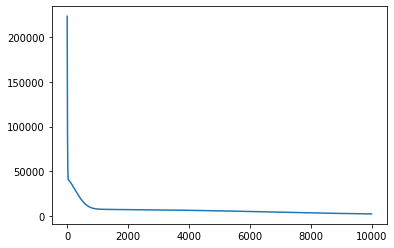

In [64]:
ax = plt.gca()
plt.plot(np.arange(0,len(np_loss_history),1),np_loss_history)

ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('loss_fn_82')

In [48]:
print(np_loss_history[:-100])

[223093.4593828625, 206544.77080281172, 191094.00270041835, 176710.0726937138, 163358.7429284185, 151002.94670391743, 139603.14833736722, 129117.72873655138, 119503.38861519047, 110715.56093176258, 102708.82409372873, 95437.30774174278, 88855.08348944614, 82916.53380690835, 77576.69324751222, 72791.5573701476, 68518.35593556993, 64715.78819743967, 61344.21930530688, 58365.83794140357, 55744.77628750623, 53447.1942368364, 51441.3304151176, 49697.52305234136, 48188.20405850101, 46887.86981701869, 45773.032237266445, 44822.15352470152, 44015.567956554165, 43335.393715168066, 42765.43755102576, 42291.09474167521, 41899.24649679557, 41578.15664634893, 41317.369147800004, 41107.60766687656, 40940.67822904305, 40809.375708345244, 40707.39471770336, 40629.245289907114, 40570.17359028154, 40526.08777855244, 40493.48903663521, 40469.407698493334, 40451.34435541935, 40437.215762641805, 40425.30533876906, 40414.21802611801, 40402.83926549958, 40390.297831838936, 40375.932275619874, 40359.260718201

In [49]:
#model.save('2020_09_10_232temp3')

In [51]:
[Sr,Ir,Rr,Dr]= solve_SIRD_discrete(num_times,model.predict(x_trains)[0][:,0],model.predict(x_trains)[0][:,1],model.predict(x_trains)[0][:,2],s0,i0,r0,d0)

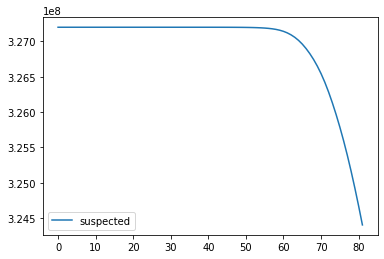

In [52]:
plt.plot(np.arange(num_times),Sr,label="suspected")
plt.legend()

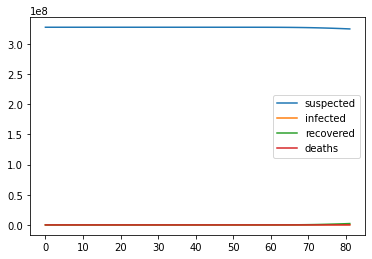

In [53]:
plt.plot(np.arange(num_times),Sr,label="suspected")
plt.plot(np.arange(num_times),Ir,label="infected")
plt.plot(np.arange(num_times),Rr,label="recovered")
plt.plot(np.arange(num_times),Dr,label="deaths")
plt.legend()

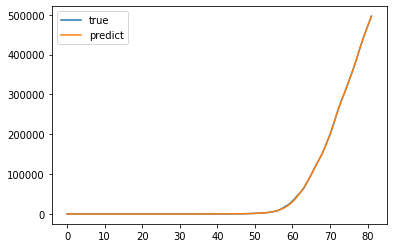

In [54]:
plt.plot(np.arange(0,num_times,1),x_trains[0][:,0],label='true')
plt.plot(np.arange(0,num_times,1),Ir,label='predict')
plt.legend()

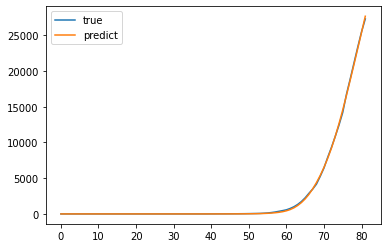

In [55]:
plt.plot(np.arange(0,num_times,1),x_trains[0][:,1],label='true')
plt.plot(np.arange(0,num_times,1),Dr,label='predict')
plt.legend()

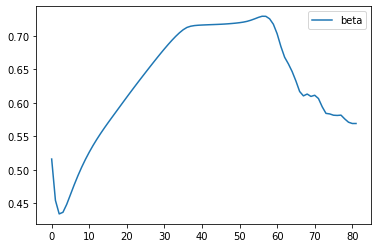

In [56]:
plt.plot(np.arange(0,num_times,1),model.predict(x_trains)[0][:,0],label='beta')
plt.legend()

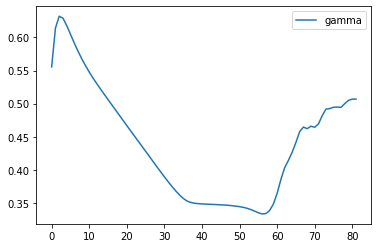

In [57]:
plt.plot(np.arange(0,num_times,1),model.predict(x_trains)[0][:,1],label='gamma')
plt.legend()

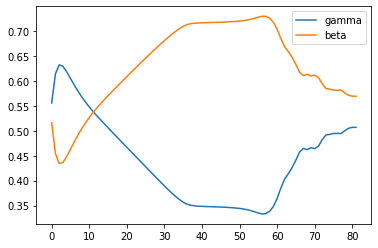

In [58]:
plt.plot(np.arange(0,num_times,1),model.predict(x_trains)[0][:,1],label='gamma')
plt.legend()
plt.plot(np.arange(0,num_times,1),model.predict(x_trains)[0][:,0],label='beta')
plt.legend()

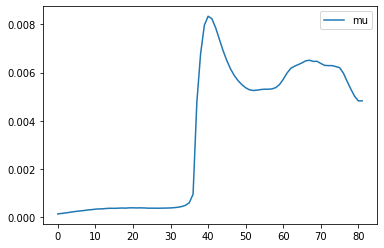

In [59]:
plt.plot(np.arange(0,num_times,1),model.predict(x_trains)[0][:,2],label='mu')
plt.legend()

In [60]:
model.predict(x_trains)

array([[[5.16059225e-01, 5.55425588e-01, 1.24820977e-04],
        [4.54382409e-01, 6.13943250e-01, 1.43633650e-04],
        [4.34099695e-01, 6.31966426e-01, 1.64758644e-04],
        [4.36516942e-01, 6.29028475e-01, 1.86306991e-04],
        [4.48341109e-01, 6.18001589e-01, 2.11832211e-04],
        [4.62951415e-01, 6.04784694e-01, 2.32362042e-04],
        [4.77584407e-01, 5.91658791e-01, 2.49742929e-04],
        [4.91342567e-01, 5.79304460e-01, 2.66883173e-04],
        [5.04043226e-01, 5.67845714e-01, 2.88520775e-04],
        [5.15644609e-01, 5.57340532e-01, 3.02127653e-04],
        [5.26322815e-01, 5.47646580e-01, 3.21600135e-04],
        [5.36204150e-01, 5.38640700e-01, 3.32974131e-04],
        [5.45362309e-01, 5.30196654e-01, 3.35987823e-04],
        [5.54023772e-01, 5.22007302e-01, 3.53023016e-04],
        [5.62253127e-01, 5.13977837e-01, 3.59028547e-04],
        [5.70173831e-01, 5.06041811e-01, 3.56995890e-04],
        [5.77911282e-01, 4.98179059e-01, 3.62357303e-04],
        [5.855

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 164)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2640      
_________________________________________________________________
dense_1 (Dense)              (None, 246)               4182      
_________________________________________________________________
reshape (Reshape)            (None, 82, 3)             0         
Total params: 6,822
Trainable params: 6,822
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.save('2020_09_10_fixed82run')

INFO:tensorflow:Assets written to: 2020_09_10_fixed82run/assets
